### 基尼系数
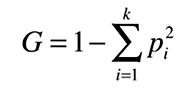

案例分析

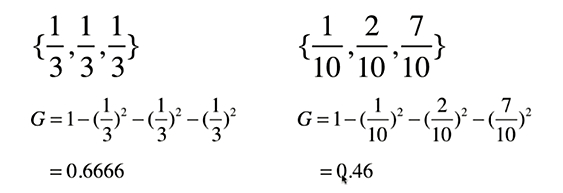

基尼系数月底，确定性越强

考虑极端情况问题
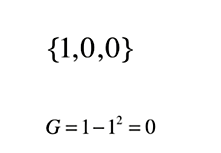

是0的时候，也就是完全的确定的情况

### 以二分类进行探究

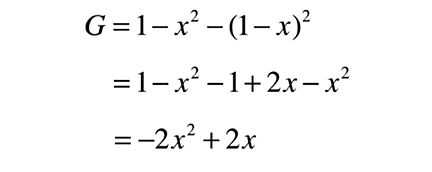

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2,criterion="gini")
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [3]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(1,-1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(1,-1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_camp = ListedColormap(['#EF9A9A','#FFF69D','#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth=5, camp=custom_camp)

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth', 'camp'
  s)


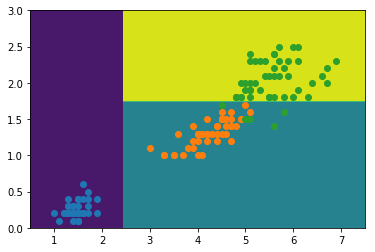

In [4]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])

### 模拟使用基尼系数划分

In [5]:
def split(X, y, d, value):
    index_a = (X[:,d] <= value)
    index_b = (X[:,d] > value)
    return X[index_a], X[index_b], y[index_a], y[index_b]
def gini(y):
    from collections import Counter
    counter = Counter(y)
    res = 1.0   # 这里和信息熵不同
    for num in counter.values():
        p = num / len(y)
        res -= p ** 2
    return res
def try_split(X, y):
    best_g = float('inf')
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):  # d多少个列
        sorted_index = np.argsort(X[:,d])  # 每个维度上进行排序
        for i in range(1,len(X)):# 每个样本进行遍历
            if X[sorted_index[i-1], d] != X[sorted_index[i], d]:  # 在同一个维度上，相邻两个如果不同
                v = (X[sorted_index[i-1], d] + X[sorted_index[i], d]) / 2
                X_l, X_r,y_l,y_r = split(X,y,d,v)
                e = gini(y_l) + gini(y_r)
                if e < best_g:
                    best_g, best_d, best_v = e, d, v
    return best_g, best_d, best_v

In [6]:
best_g, best_d, best_v = try_split(X, y)
print(best_g, best_d, best_v)

0.5 0 2.45


In [7]:
X1_l, X1_r,y1_l,y1_r = split(X, y, best_d, best_v)

In [8]:
gini(y1_l)

0.0

左边是最小值没第一类已经分开

In [9]:
gini(y1_r)

0.5

In [10]:
best_g2, best_d2, best_v2 = try_split(X1_r, y1_r)
print(best_g2, best_d2, best_v2)

0.2105714900645938 1 1.75


In [11]:
X2_l, X2_r,y2_l,y2_r = split(X1_r, y1_r, best_d2, best_v2)

In [12]:
gini(y2_l)

0.1680384087791495

In [13]:
gini(y2_r)

0.04253308128544431

现在这两个节点还没有到0，所以还可以继续进行深入探究

### 信息熵vs基尼系数

信息熵的计算比基尼系数稍慢

scikit-learn.org中默认为基尼系数

大多数时候二者没有特别的效果优劣

图像知识高度有区别，其他比较相似